In [61]:
import pandas as pd 
import numpy as np

In [120]:
environnement_normees = pd.read_csv('../preprocessing/donnees_environnement_capteurs.csv', sep=';')

index = environnement_normees['Capteurs']
colonnes = environnement_normees.columns
environnement_normees = environnement_normees.drop(environnement_normees.columns[0], axis=1)

In [63]:
environnement_normees.corr()

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
Typologie_zone,1.000000,-0.220877,0.248868,0.370505,0.052886,-0.047574,0.069767,-0.347928,0.207387,-0.201783,0.173556,-0.209963,-0.235349,-0.225360,0.053727,-0.101846
Type_voie,-0.220877,1.000000,-0.123736,-0.197064,0.231297,0.123229,0.145318,0.252474,-0.029009,0.120798,-0.027930,0.126842,0.152644,0.129805,0.071804,0.039661
Nombre_voies,0.248868,-0.123736,1.000000,0.192088,0.148088,-0.147471,-0.003752,-0.195107,0.137270,-0.118138,0.256226,-0.728442,-0.700993,-0.731524,-0.307444,-0.488624
Distance_capteur_voie,0.370505,-0.197064,0.192088,1.000000,-0.147529,-0.382069,-0.302956,-0.234479,0.101660,-0.123446,0.016604,-0.293408,-0.227236,-0.297856,0.137896,-0.048350
Position_capteurs,0.052886,0.231297,0.148088,-0.147529,1.000000,0.308228,0.280040,-0.073903,0.172549,-0.034501,0.166979,-0.243835,-0.155039,-0.238002,-0.178201,-0.227337
Presence_arbres,-0.047574,0.123229,-0.147471,-0.382069,0.308228,1.000000,0.747910,0.169085,-0.012202,0.267400,0.049689,0.075030,0.064935,0.078650,-0.312424,-0.194273
Feuille_arbres,0.069767,0.145318,-0.003752,-0.302956,0.280040,0.747910,1.000000,0.126073,0.021321,0.198364,0.024348,-0.111425,-0.135904,-0.112689,-0.371634,-0.336961
Morphologie_urbaine,-0.347928,0.252474,-0.195107,-0.234479,-0.073903,0.169085,0.126073,1.000000,-0.556931,0.557476,-0.276683,-0.016390,0.010322,-0.010161,-0.307084,-0.216647
Hauteur_batiments,0.207387,-0.029009,0.137270,0.101660,0.172549,-0.012202,0.021321,-0.556931,1.000000,-0.194532,0.134608,-0.116751,-0.115277,-0.123036,0.270166,0.032952
Distance_capteur_batiment,-0.201783,0.120798,-0.118138,-0.123446,-0.034501,0.267400,0.198364,0.557476,-0.194532,1.000000,-0.239988,-0.091284,0.036386,-0.081452,-0.293546,-0.191614


In [64]:
Y_tsne = environnement_normees.to_numpy()
Y_acp = environnement_normees.to_numpy()

## Début ACP

In [65]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [66]:
pca = PCA(n_components=16)
pca.fit(Y_acp)

print(pca.explained_variance_ratio_)
print(pca.get_covariance())

[2.79206849e-01 1.89389469e-01 1.21158054e-01 7.31152966e-02
 6.53207906e-02 5.24010400e-02 4.30007014e-02 3.93055934e-02
 3.13411286e-02 3.09254262e-02 2.33899708e-02 1.81245351e-02
 1.43619639e-02 1.14167913e-02 7.50622980e-03 3.61605720e-05]
[[ 1.01041667 -0.22317808  0.25146054  0.37436407  0.05343735 -0.04806906
   0.07049364 -0.35155207  0.20954739 -0.20388511  0.17536383 -0.21215008
  -0.23780072 -0.22770753  0.05428619 -0.10290664]
 [-0.22317808  1.01041667 -0.12502507 -0.19911656  0.2337066   0.12451252
   0.14683194  0.25510389 -0.02931113  0.12205639 -0.02822133  0.12816277
   0.15423437  0.13115706  0.07255147  0.04007379]
 [ 0.25146054 -0.12502507  1.01041667  0.19408912  0.14963033 -0.14900757
  -0.0037911  -0.19713934  0.13869946 -0.11936857  0.25889511 -0.73602965
  -0.70829469 -0.73914418 -0.31064651 -0.49371333]
 [ 0.37436407 -0.19911656  0.19408912  1.01041667 -0.14906576 -0.38604848
  -0.30611167 -0.23692142  0.10271917 -0.12473214  0.01677707 -0.296464
  -0.2296035

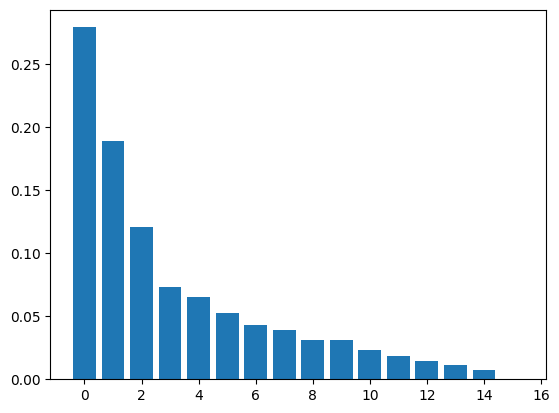

In [67]:
x = np.arange(0, 16, 1)
y = pca.explained_variance_ratio_
plt.bar(x, y)
plt.show()

In [68]:
print(np.cumsum(pca.explained_variance_ratio_))
print("====")
print(pca.explained_variance_ratio_)

[0.27920685 0.46859632 0.58975437 0.66286967 0.72819046 0.7805915
 0.8235922  0.86289779 0.89423892 0.92516435 0.94855432 0.96667885
 0.98104082 0.99245761 0.99996384 1.        ]
====
[2.79206849e-01 1.89389469e-01 1.21158054e-01 7.31152966e-02
 6.53207906e-02 5.24010400e-02 4.30007014e-02 3.93055934e-02
 3.13411286e-02 3.09254262e-02 2.33899708e-02 1.81245351e-02
 1.43619639e-02 1.14167913e-02 7.50622980e-03 3.61605720e-05]


**Part d'inertie** : choisit le nombre d'axe de façon à conserver une certaine part de l'inertie total, cela revient à fixer un seuil de qualité global

**Regle de Kaiser** : On retient que les axes associés aux valeurs propres considérées comme les plus "informatives", donc supérieures à leurs mopyennes I/p

**Eboulis des valeurs propres** : On trace un graphe représentant la décroissance des valeurs propres et on cherche un coude dans le graphe. On retient les axes associées aux valeurs propres situées avant le coude. 

5, 4, 4, 

## ACP sur uniquement 4 composant 

In [84]:
pca = PCA(n_components=2)
Z_acp = pca.fit_transform(Y_acp)



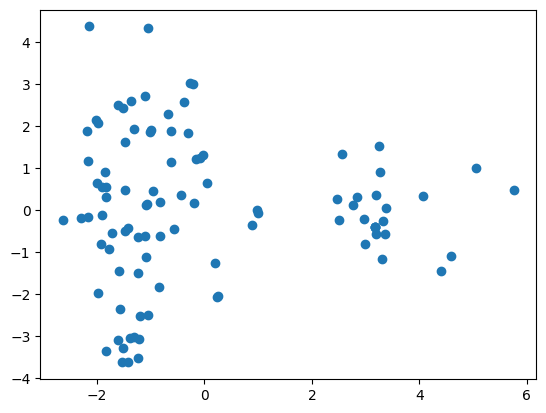

In [85]:
x = Z[:,0]
y = Z[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

In [86]:
tsne = TSNE(n_components=2, random_state=42)
Z_tsne = tsne.fit_transform(Z_acp)


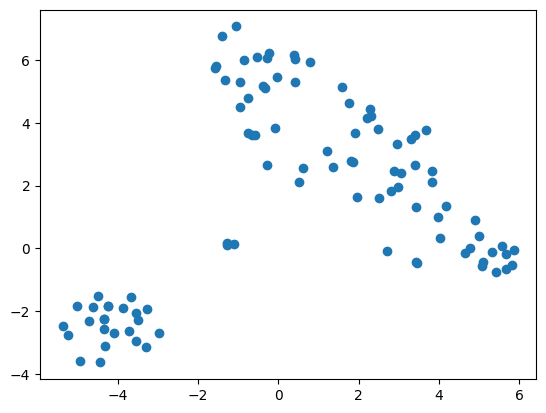

In [87]:
x = Z_tsne[:,0]
y = Z_tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

In [101]:
matrice = np.triu(environnement_normees.corr(), k=1)

In [102]:


# Récupérer les indices des valeurs les plus corrélées positivement
indices_corr_positives = np.where((matrice > 0.8) & (matrice < 1))

# Récupérer les indices des valeurs les plus corrélées négativement
indices_corr_negatives = np.where((matrice < -0.73) & (matrice > -1))


In [117]:
indices_corr_positives

(array([11, 11, 12], dtype=int64), array([12, 13, 13], dtype=int64))

In [104]:
c

(array([2], dtype=int64), array([13], dtype=int64))

In [114]:

indices_moins_corr = np.where((np.abs(matrice) > 0) & (np.abs(matrice) < 0.01))


In [115]:
indices_moins_corr

(array([2], dtype=int64), array([6], dtype=int64))

In [122]:
colonnes[indices_moins_corr]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed